In [1]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Load paths to each set of experiments
control_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
control = Experiment(control_path)

In [3]:
layers_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/layers.xlsx'
dtype = dict(experiment=str, disc_genotype=str, disc_id=int, layer=int, include=bool, region=str)
layers_df = pd.read_excel(layers_path, usecols=6, dtype=dtype)
layers_df.ix[layers_df.include==0, 'region'] = 'n'

In [28]:
genotype = 'w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
df = layers_df[layers_df.disc_genotype==genotype]

In [111]:
with PdfPages('controls.pdf') as pdf:    
    for disc_id in control.disc_names:
        stack = control.discs[disc_id].load_stack()
        fig = show_stack(stack, df)
        pdf.savefig(fig, dpi=300)
        plt.close()

In [110]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec


def show_stack(stack, df):
    disc_df = df[df.disc_id==disc_id]
    layers = disc_df[disc_df.include].layer.values
    
    fig = plt.figure(figsize=(6.75, 2.25*len(layers)))
    gs = GridSpec(nrows=len(layers), ncols=3, wspace=.01, hspace=.01)
    
    i = 0
    for layer_id in layers:
        include = df[np.logical_and(df.disc_id==disc_id, df.layer==layer_id)].include.values[0]
        if include:
            axes = fig.add_subplot(gs[i*3]), fig.add_subplot(gs[i*3+1]), fig.add_subplot(gs[i*3+2])            
            layer = stack.load_layer(layer_id)
            
            show_layer(layer, axes)
            if i == 0:
                axes[0].set_title('DAPI', fontsize=14)
                axes[1].set_title('UbiRFP', fontsize=14)
                axes[2].set_title('PntGFP', fontsize=14)
            
            i += 1
        
    return fig
    

def show_layer(layer, axes):
    layer.set_foreground(bandwidth=100, n=4)
    ax0, ax1, ax2 = axes
    
    _ = layer.get_channel('b').show(segments=False, ax=ax0, vmin=0, vmax=1)
    _ = layer.get_channel('r').show(segments=False, ax=ax1, vmin=0, vmax=1)
    _ = layer.get_channel('g').show(segments=False, ax=ax2, vmin=0, vmax=1)
    
    for ax in (ax1, ax2):
        layer.fg_mask.add_contourf(ax, alpha=.5)
    for ax in axes:
        ax.set_aspect(1)
    
    plt.tight_layout()

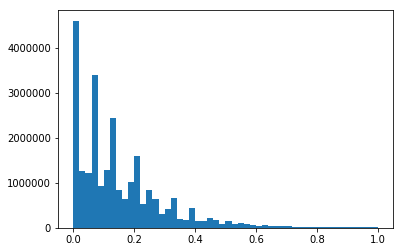

In [164]:
pixels = stack.stack.flatten()
_ = plt.hist(pixels, bins=50)

In [139]:
r = layer.get_channel('r')
g = layer.get_channel('g')

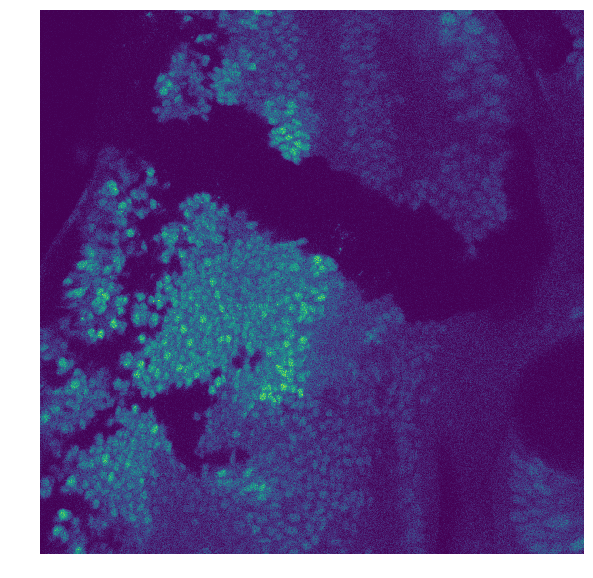

In [140]:
_ = r.show(segments=False)

In [141]:
bg = (layer.labels==0).nonzero()
background_r = r.im[bg]
background_g = g.im[bg]

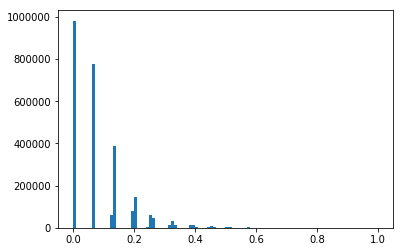

In [143]:
_ = plt.hist(background_g, bins=100)

In [146]:
np.unique(background_g).size

75

In [166]:
disc = control.discs[disc_id]
#disc.load_stack()

In [169]:
stack = disc.load_stack()

/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A/56.tif


In [170]:
tif_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A/56.tif'

In [171]:
import tifffile as tf

In [211]:
raw_image = tf.imread(tif_path)

In [212]:
np.unique(raw_image.ravel()).size

1526

In [231]:
raw_image

56

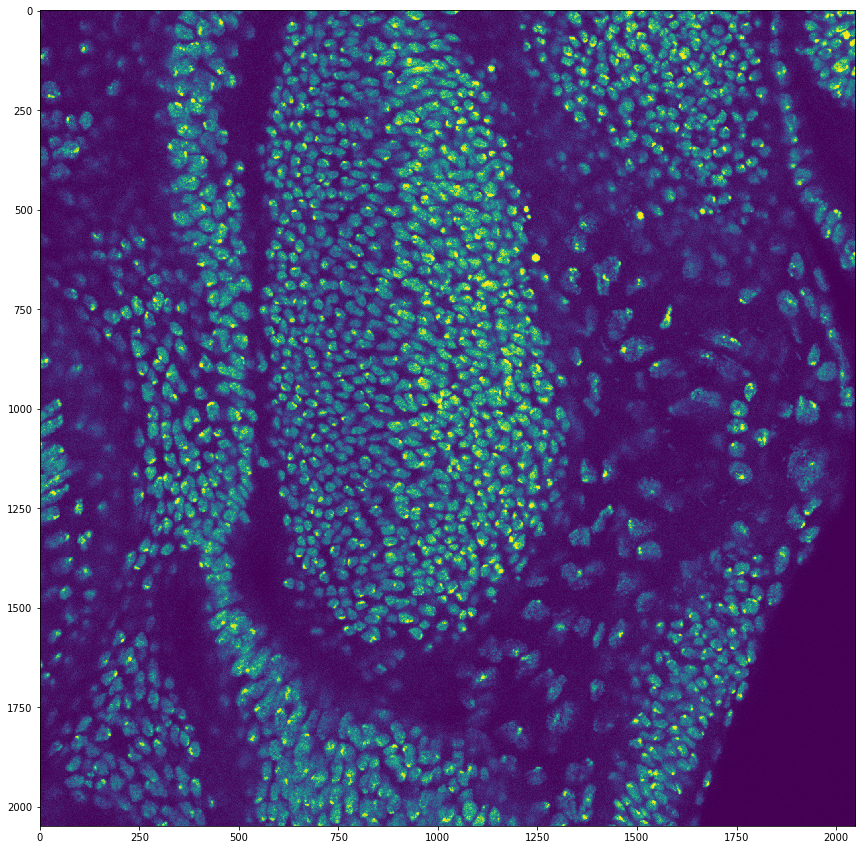

In [232]:
ch = 0
im = raw_image[0][ch]

plt.subplots(figsize=(15, 15))
plt.imshow(im)

In [260]:
stack = control.discs[31].load_stack()
layer = stack.get_layer(0)
channel = layer.get_channel('g')
np.unique(channel.im).size
fig, ax = plt.subplots(figsize=(15, 2))
c,b,_ = ax.hist(channel.im.flatten(), bins=256)

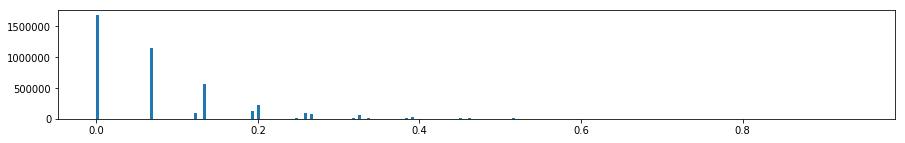

In [263]:
np.unique(channel.im)

array([0.        , 0.05859375, 0.06689453, 0.1171875 , 0.12475586,
       0.12573242, 0.1340332 , 0.17602539, 0.18359375, 0.18432617,
       0.19189453, 0.19262695, 0.20117188, 0.2421875 , 0.24316406,
       0.24975586, 0.25073242, 0.25146484, 0.2590332 , 0.25976562,
       0.26831055, 0.30102539, 0.30175781, 0.31689453, 0.32617188,
       0.33520508, 0.35205078, 0.37475586, 0.3840332 , 0.39306641,
       0.40234375, 0.44189453, 0.45117188, 0.46020508, 0.46948242,
       0.49975586, 0.5090332 , 0.51806641, 0.52734375, 0.53662109,
       0.56689453, 0.57592773, 0.58520508, 0.59448242, 0.62475586,
       0.6340332 , 0.64306641, 0.65234375, 0.69189453, 0.70092773,
       0.71020508, 0.74975586, 0.75878906, 0.76806641, 0.81689453,
       0.82592773, 0.87475586, 0.88378906, 0.94165039])

In [255]:
px = pd.read_csv('/Users/Sebi/Desktop/Histogram of disc56a_copy.csv')

In [ ]:
from modules.background import BackgroundCorrection

In [276]:
control.discs

{29: <modules.paths.Disc at 0x1729fad30>,
 30: <modules.paths.Disc at 0x166501780>,
 31: <modules.paths.Disc at 0x16658a2e8>,
 28: <modules.paths.Disc at 0x16651f9b0>,
 55: <modules.paths.Disc at 0x16605bdd8>,
 56: <modules.paths.Disc at 0x1660821d0>}

In [212]:
disc_id = 28
layer_id = 0
stack = control.discs[disc_id].load_stack()
layer = stack.load_layer(layer_id)

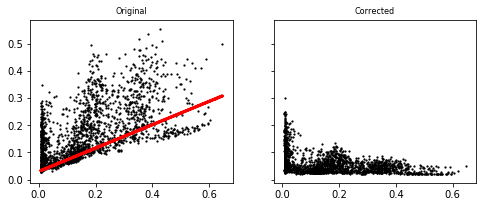

In [213]:
correction = BackgroundCorrection(layer, niters=10)
correction.show_correction()